realized that due to the yearly CO2 concentration-fluctuation, and the yearly summer winter cycle that we would prob not be able to find correct correlations while using yearly data, maybe we should normalise according to month. i will first test if the CO2 concentration is actually different each month. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import os

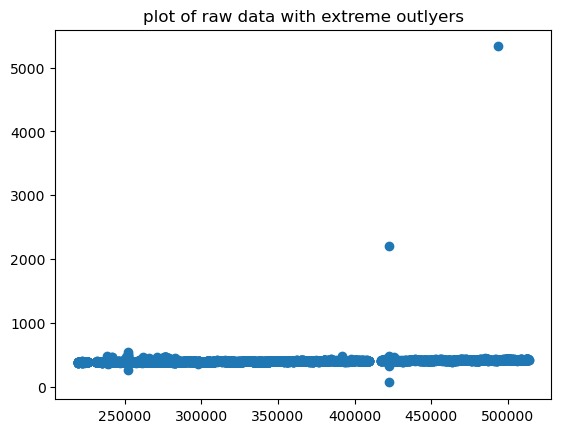

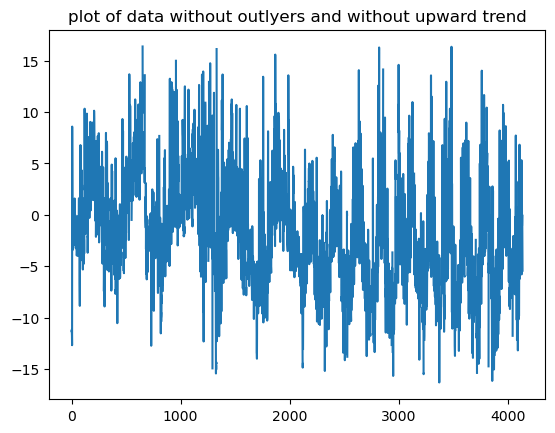

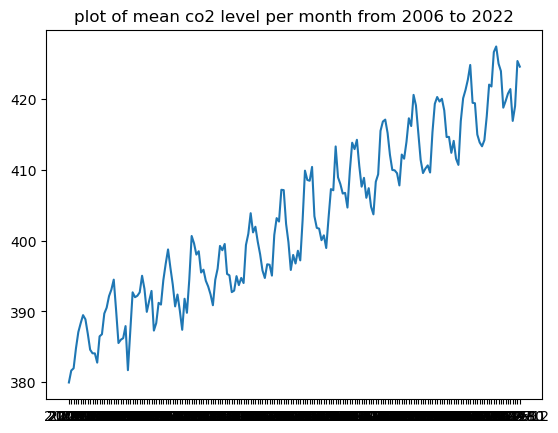

In [6]:
# cleaning the CO2 data
co2 = "dataset/CO2_data_raw.txt"
co2_df = pd.read_csv(co2, header= 148, sep = " ") # header lines given in original txt file
plt.scatter(co2_df["event_number"], co2_df["value"])
plt.title("plot of raw data with extreme outlyers")
plt.show()  # raw data


slope, intercept, _, _, _ = linregress(co2_df["event_number"], co2_df["value"]) # getting linear regresion data of uncleaned datafile
trend = slope * co2_df["event_number"] + intercept
detrended_data = co2_df["value"] - trend # getting co2 data withoud upward trend
detrended_data_clean = detrended_data[(np.abs(stats.zscore(detrended_data)) < 0.2)] # removing outlyers from detrended data


#creating new df with the detreded data and cleaned data to regain the order of the original data within the cleaned data
new_df = pd.concat([detrended_data, detrended_data_clean], axis = 1) 

#plotting raw data without outlyers
new_df.rename(columns = {0 : "old", 1 : "new"}, inplace = True)#renaming columns
plt.plot(new_df.index, new_df["new"])
plt.title("plot of data without outlyers and without upward trend")
plt.show()

#plotting per month mean of original data without outlyers and with original trend
cleaned_data = detrended_data_clean + trend # replotting new plot without outlyers
co2_df["co2_correct"] = pd.concat([cleaned_data], axis = 1)#concat the new list without the outlyers
mean_df = pd.DataFrame  
mean_df= co2_df.groupby(["year", "month" ])["co2_correct"].mean() #calc mean per year and month
x_labels = mean_df.index.map(lambda x: f"{x[0]}-{x[1]}") #creating x labels for plot
plt.plot(x_labels, mean_df)
plt.title("plot of mean co2 level per month from 2006 to 2022")
plt.show()

#saving as csv
os.chdir("dataset")
mean_df.to_csv('meanCO2_values.csv', index=True) 
os.chdir("..")